Chapter 7: Spatiotemporal Data

Script 7-1: Analysis of Burkina Faso Market Dataset

In [2]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#import Burkina Faso market millet prices
File="/Users/franckm/Documents/draftcodefiles/BF_Millet.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [4]:
#import weight matrix of Burkina Faso markets
File="/Users/franckm/Documents/draftcodefiles/weights_bk.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
weights=pd.read_csv(os.path.basename(File),encoding='latin1')

In [5]:
#score in yearly sets with 3 quarter overlap
vcurv_t=[]
vcurv_ave=[]
eig_t=[]
eig_ave=[]
nets=[]
for Year in range(4,29):
    data=mydata.iloc[(Year-4):(Year),1:46]
    cor=np.corrcoef(data.transpose())
    weights_total=weights.iloc[:,1:46]
    cor[cor>=0.9]=1
    cor[cor<0.9]=0
    cor_weighted=np.multiply(cor,weights_total)
    bf_market_w=Graph.Adjacency(cor_weighted,diag=False)
    edge_list=bf_market_w.get_edgelist()
    self_loop=[]
    for i in range(0,46):
        self=(i,i)
        self_loop.append(self)
    to_remove=[]
    for i in edge_list:
        for j in self_loop:
            if i==j:
                to_remove.append(i)
    bf_market_w.delete_edges(to_remove)
    nets.append(bf_market_w)
    d=Graph.degree(bf_market_w)
    e=Graph.pagerank(bf_market_w)
    eig_t.append(e)
    eig_ave.append(np.mean(e))
    ecurvw=[]
    for edge in bf_market_w.es:
        s=edge.source
        t=edge.target
        ecurvw.append(2-d[s]-d[t])
    vcurvw=[]
    for vertex in bf_market_w.vs:
        inc=Graph.incident(bf_market_w,vertex)
        inc_curv=[]
        for i in inc:
            inc_curv.append(ecurvw[i])
        vcurvw.append(sum(inc_curv))
    vcurv_t.append(vcurvw)
    vcurv_ave.append(np.mean(vcurv_t))

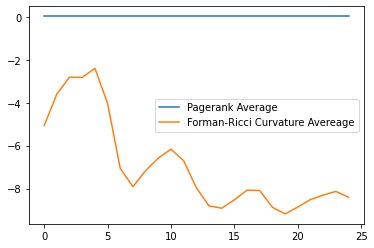

In [6]:
#plot metric averages across time slices
time=range(0,25)
plt.plot(time, eig_ave, label = "Pagerank Average")
plt.plot(time, vcurv_ave, label = "Forman-Ricci Curvature Avereage")
plt.legend()
plt.show()

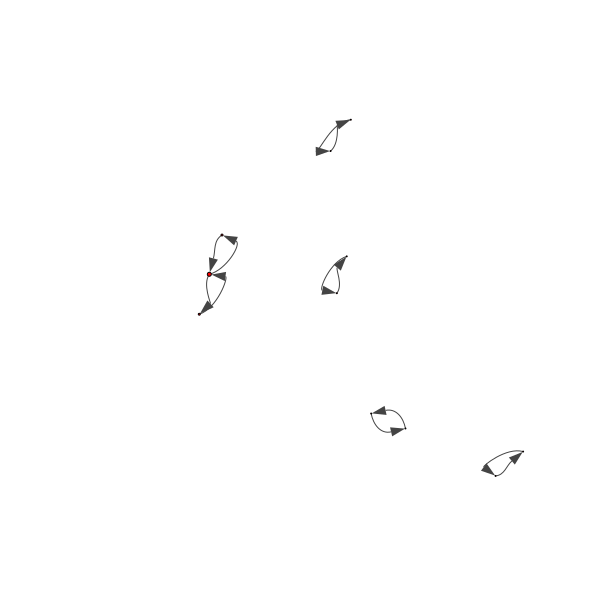

In [7]:
#examine different time points with Forman-Ricci curvature plots, fourth slice
ig.plot(nets[4],vertex_size=np.array(vcurv_t[4])*-0.5)

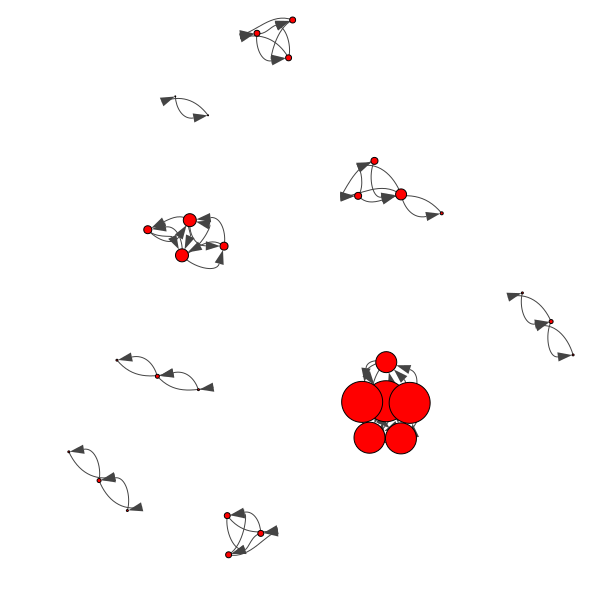

In [8]:
#examine different time points with Forman-Ricci curvature plots, 19th slice
ig.plot(nets[19],vertex_size=np.array(vcurv_t[19])*-0.5)

Script 7-2: Store Sales Dataset

In [8]:
#import Store Sales dataset
File="C:/users/njfar/OneDrive/Desktop/Store_Sales.csv"

pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [9]:
#score in yearly sets with 3 quarter overlap
vcurv_t=[]
vcurv_ave=[]
eig_t=[]
eig_ave=[]
nets=[]
for Month in range(2,54):
    data=mydata.iloc[(Month-2):(Month),1:6]
    cor=np.corrcoef(data.transpose())
    cor[cor>=0.9]=1
    cor[cor<0.9]=0
    stores=Graph.Adjacency(cor,diag=False)
    edge_list=stores.get_edgelist()
    self_loop=[]
    for i in range(0,46):
        self=(i,i)
        self_loop.append(self)
    to_remove=[]
    for i in edge_list:
        for j in self_loop:
            if i==j:
                to_remove.append(i)
    stores.delete_edges(to_remove)
    nets.append(stores)
    d=Graph.degree(stores)
    e=Graph.pagerank(stores)
    eig_t.append(e)
    eig_ave.append(np.mean(e))
    ecurvw=[]
    for edge in stores.es:
        s=edge.source
        t=edge.target
        ecurvw.append(2-d[s]-d[t])
    vcurvw=[]
    for vertex in stores.vs:
        inc=Graph.incident(stores,vertex)
        inc_curv=[]
        for i in inc:
            inc_curv.append(ecurvw[i])
        vcurvw.append(sum(inc_curv))
    vcurv_t.append(vcurvw)
    vcurv_ave.append(np.mean(vcurv_t))

C:\Users\njfar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\njfar\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


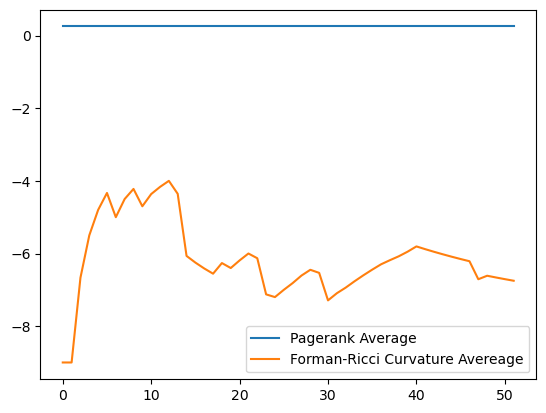

In [10]:
#plot metric averages across time slices
time=range(0,52)
plt.plot(time, eig_ave, label = "Pagerank Average")
plt.plot(time, vcurv_ave, label = "Forman-Ricci Curvature Avereage")
plt.legend()
plt.show()

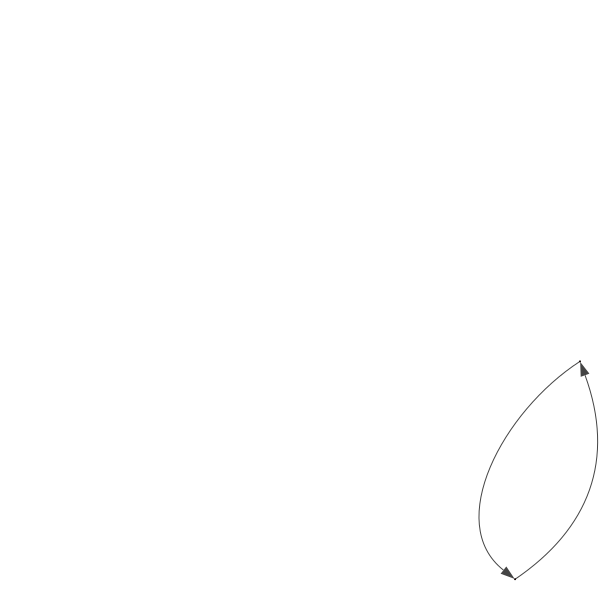

In [11]:
#examine different time points with Forman-Ricci curvature plots, tenth slice
ig.plot(nets[10],vertex_size=np.array(vcurv_t[10])*-0.5)

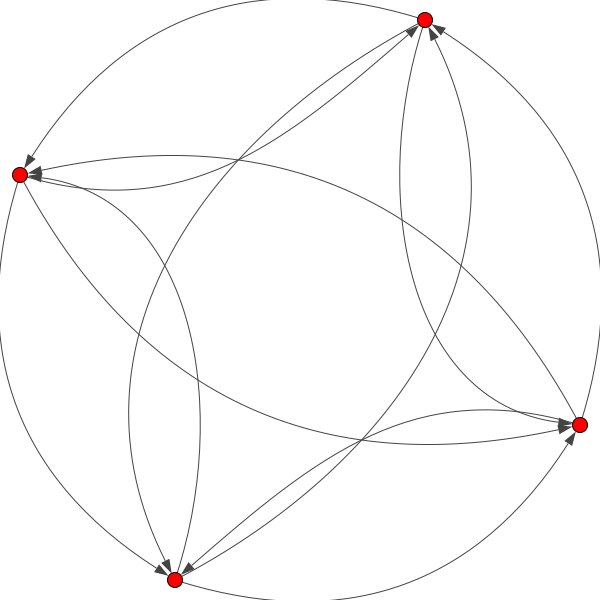

In [12]:
#examine different time points with Forman-Ricci curvature plots, thirtieth slice
ig.plot(nets[30],vertex_size=np.array(vcurv_t[30])*-0.5)